In [1]:
#Importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#Criação e visualização do dataframe
df = pd.read_excel("/content/drive/MyDrive/Datasets/AdventureWorks.xlsx")
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
#Quantidade de linhas e colunas do dataframe
df.shape

(904, 16)

In [5]:
#Tipos de dados das colunas
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
#Receita total
df["Valor Venda"].sum()

5984606.1426

In [7]:
#Criação da coluna que contém o custo
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [8]:
#Custo total
round(df["Custo"].sum(), 2)

2486783.05

In [9]:
#Criação da coluna que contém o lucro
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [10]:
#Lucro total
round(df["Lucro"].sum(), 2)

3497823.09

In [11]:
#Criação da coluna que contém o tempo de envio de uma venda
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]

In [13]:
#Visualizar o dataframe depois da criação da coluna
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
365,2009-03-28,2009-04-07,199,1202,18926,200903284CS835,330.66,998.0,16,798.40,15169.60,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,5290.56,9879.04,10 days
879,2008-12-29,2009-01-02,306,366,19060,200812293CS676,348.58,758.0,6,909.60,3638.40,Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,2091.48,1546.92,4 days
581,2008-08-04,2008-08-17,199,1203,18859,200808044CS658,324.69,980.0,8,784.00,7056.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,2597.52,4458.48,13 days
456,2008-02-04,2008-02-17,199,1226,18819,200802044CS570,330.99,999.0,11,549.45,10439.55,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,3640.89,6798.66,13 days
364,2009-01-06,2009-01-12,307,1203,19112,200901064CS679,324.69,980.0,16,2352.00,13328.00,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,5195.04,8132.96,6 days


In [14]:
#Passar a coluna tempo de envio para inteiro
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [15]:
#Média de tempo de envio de cada marca
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [17]:
#Verificação se há valores faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [22]:
#Total de lucro de cada marca em cada ano
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [21]:
#Muda o formato em que os números ficam. Por exemplo, se o número aparece 1.2e+5 ficará 120,000.00
pd.options.display.float_format = '{:20,.2f}'.format

In [23]:
#Coloca o total de lucro de cada marca em cada ano no formato de um dataframe
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [24]:
#Quantidade vendida de cada produto
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

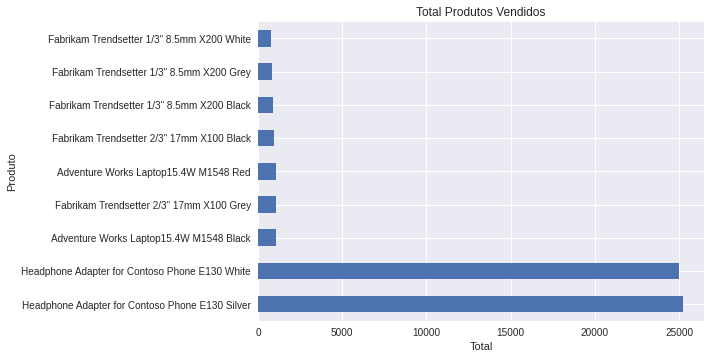

In [52]:
#Gráfico de barra da quantidade vendida de cada produto
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False).plot.barh(title = "Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");
plt.savefig("Gráfico Total Produtos Vendidos.png")

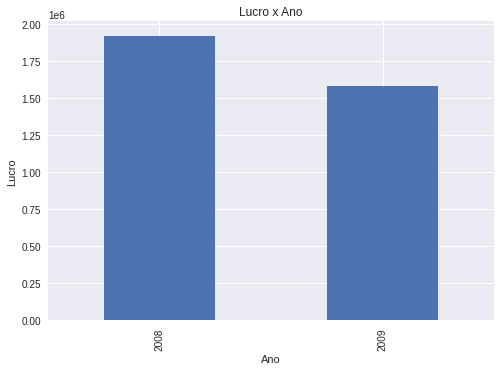

In [53]:
#Gráfico de barra do lucro em cada ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title = "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");
plt.savefig("Gráfico Lucro por Ano.png")

In [47]:
#Cria e vizualiza um dataframe com os dados de venda do ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


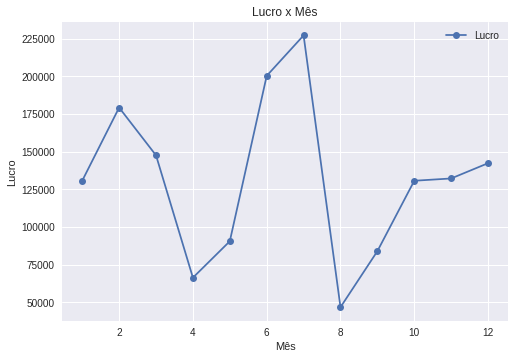

In [54]:
#Cria um gráfico de linha do lucro em cada mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro x Mês", marker = "o")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.legend();
plt.savefig("Gráfico do Lucro por Mês.png")

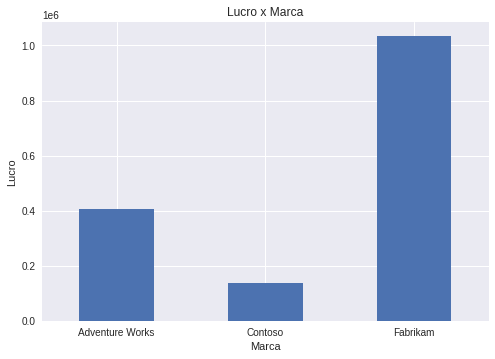

In [55]:
#Cria um gráfico de barras do lucro por marca em 2009
df_2009.groupby(df_2009["Marca"])["Lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal");
plt.savefig("Gráfico do Lucro por Marca.png")

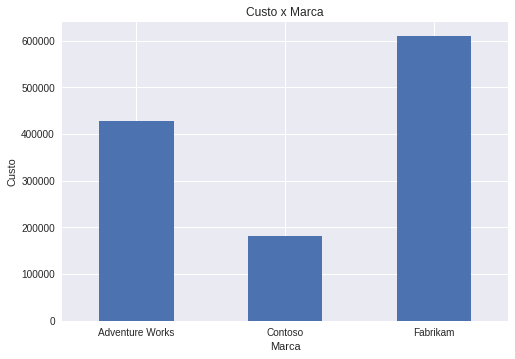

In [51]:
#Cria um gráfico de barras do custo por marca em 2009
df_2009.groupby(df_2009["Marca"])["Custo"].sum().plot.bar(title = "Custo x Marca")
plt.xlabel("Marca")
plt.ylabel("Custo")
plt.xticks(rotation = "horizontal");
plt.savefig("Gráfico do Custo por Marca.png")

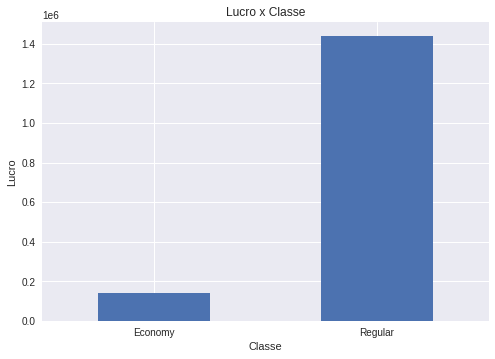

In [56]:
#Cria um gráfico do lucro por classe em 2009
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = "horizontal");
plt.savefig("Gráfico do Lucro por Classe.png")

In [42]:
#Descrição estatística do tempo de envio
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

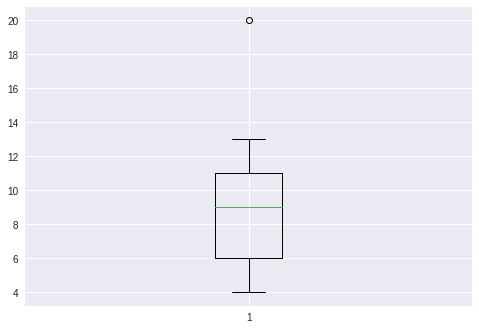

In [43]:
#Boxsplot do tempo de envio
plt.boxplot(df["Tempo Envio"]);

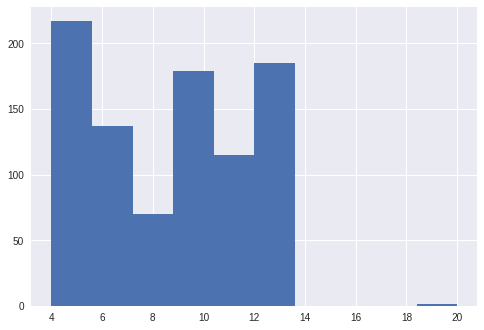

In [57]:
#Histograma do tempo de envio
plt.hist(df["Tempo Envio"]);
plt.savefig("Histograma do Tempo de Envio.png")

In [46]:
#Cria uma tabela no formato csv com as modificações realizadas
df.to_csv("df_vendas_novo.csv", index = False)